In [ ]:
pip install yfinance

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

# Define a diverse set of stocks across sectors and price ranges
tickers = [
    'AAPL',
    'MSFT',
    'GOOGL',
    'JNJ',
    'XOM',   # Energy
    'JPM',   # Financials  # Consumer Discretionary
    'NVDA',  # Technology
    'AMZN',  # Consumer Discretionary
    'PFE',   # Healthcare
    'F',     # Low price, Consumer Discretionary
    'GE',    # Medium price, Industrials
    'BRK-B', # High price, Financials
    'CVX',   # Energy
    'WMT',   # Consumer Staples
    'DUK',
    'SO',
    'CAT',
    'BA',
    'PG',
    'KO',
    ]

# time horizon
start_date = '2010-01-01'
end_date = '2018-12-31'

data = yf.download(tickers, start=start_date, end=end_date, progress=False)['Adj Close']

returns = np.log(data / data.shift(1))

# Reflect on stock data
print("Selected Stocks:", tickers)
print(f"Time Horizon: {start_date} to {end_date}")
print("Stock Price Ranges:")
print(data.iloc[-1].sort_values())
print("\nMissing Data Summary:")
print(data.isna().sum())

# Save results to CSV for further analysis
data.to_csv('stock_prices.csv')
returns.to_csv('stock_returns.csv')


Selected Stocks: ['AAPL', 'MSFT', 'GOOGL', 'JNJ', 'XOM', 'JPM', 'NVDA', 'AMZN', 'PFE', 'F', 'GE', 'BRK-B', 'CVX', 'WMT', 'DUK', 'SO', 'CAT', 'BA', 'PG', 'KO']
Time Horizon: 2010-01-01 to 2018-12-31
Stock Price Ranges:
Ticker
NVDA       3.314357
F          5.868864
WMT       27.987799
PFE       31.726021
SO        34.455795
GE        35.120899
AAPL      37.305058
KO        39.181683
XOM       51.044338
GOOGL     52.204735
DUK       67.351425
AMZN      73.901001
PG        78.388603
JPM       81.263153
CVX       83.596260
MSFT      94.622490
JNJ      107.748833
CAT      109.449738
BRK-B    202.080002
BA       307.425415
Name: 2018-12-28 00:00:00, dtype: float64

Missing Data Summary:
Ticker
AAPL     0
AMZN     0
BA       0
BRK-B    0
CAT      0
CVX      0
DUK      0
F        0
GE       0
GOOGL    0
JNJ      0
JPM      0
KO       0
MSFT     0
NVDA     0
PFE      0
PG       0
SO       0
WMT      0
XOM      0
dtype: int64


Average Return (Annualized):
 AAPL     0.162009
MSFT     0.122959
GOOGL    0.059560
JNJ      0.060800
XOM      0.026657
JPM      0.078088
NVDA     0.286020
AMZN     0.228330
PFE      0.087394
F        0.008782
GE       0.043582
BRK-B    0.086251
CVX      0.004978
WMT      0.052672
DUK      0.054643
SO       0.066112
CAT      0.070695
BA       0.170305
PG       0.038572
KO       0.059132
dtype: float64

Volatility (Annualized):
 AAPL     0.196022
MSFT     0.181921
GOOGL    0.182581
JNJ      0.115455
XOM      0.118930
JPM      0.166589
NVDA     0.299174
AMZN     0.253510
PFE      0.138646
F        0.167111
GE       0.129096
BRK-B    0.130348
CVX      0.147297
WMT      0.134450
DUK      0.120568
SO       0.115132
CAT      0.184104
BA       0.177149
PG       0.115310
KO       0.116816
dtype: float64

Sharpe Ratio:
 AAPL     0.826485
MSFT     0.675897
GOOGL    0.326213
JNJ      0.526607
XOM      0.224139
JPM      0.468746
NVDA     0.956033
AMZN     0.900676
PFE      0.630339
F        0.0525

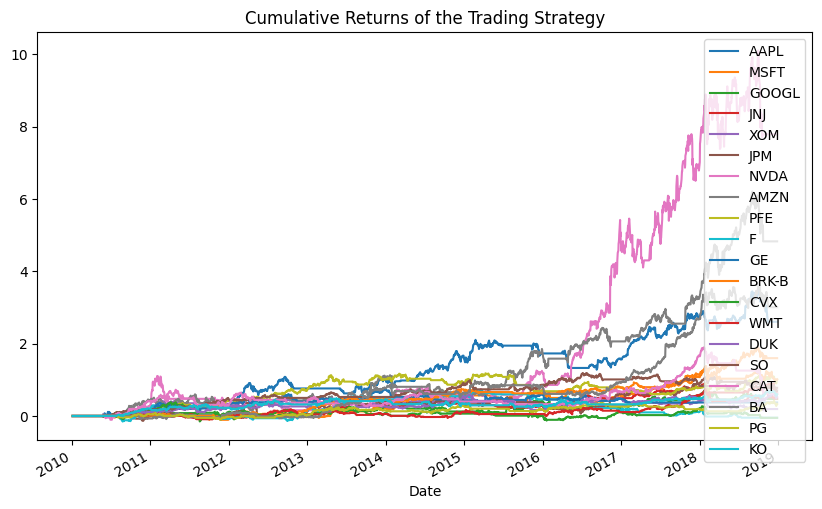


Number of days the strategy worked: 14792
Number of days the strategy failed: 30448

Percentage of working periods per stock:
 AAPL     37.074680
MSFT     34.555899
GOOGL    32.699956
JNJ      33.672117
XOM      26.955369
JPM      32.744145
NVDA     36.014141
AMZN     37.163058
PFE      34.644278
F        23.773752
GE       23.994697
BRK-B    35.262925
CVX      29.695095
WMT      31.904551
DUK      36.235086
SO       35.881573
CAT      29.341582
BA       35.483871
PG       32.081308
KO       34.467521
dtype: float64

Percentage of failing periods per stock:
 AAPL     62.881131
MSFT     65.399912
GOOGL    67.255855
JNJ      66.283694
XOM      73.000442
JPM      67.211666
NVDA     63.941670
AMZN     62.792753
PFE      65.311533
F        76.182059
GE       75.961114
BRK-B    64.692886
CVX      70.260716
WMT      68.051259
DUK      63.720725
SO       64.074238
CAT      70.614229
BA       64.471940
PG       67.874503
KO       65.488290
dtype: float64


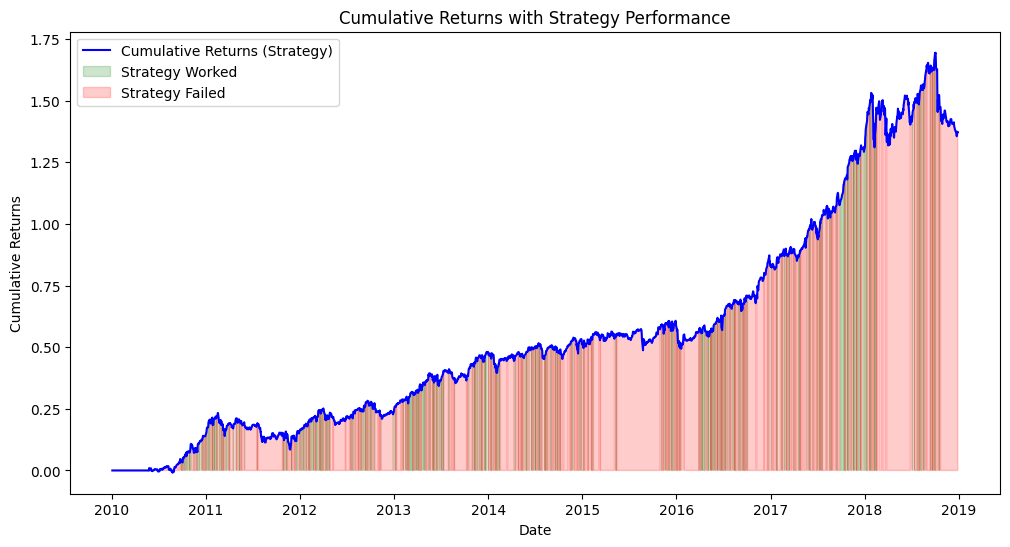

In [ ]:
import matplotlib.pyplot as plt

#Calculate moving averages
sma_short = data.rolling(window=50).mean()  # 50-day SMA
sma_long = data.rolling(window=200).mean()  # 200-day SMA

# Define Buy and Sell signals based on crossovers
signals = pd.DataFrame(index=data.index)
for ticker in tickers:
    signals[ticker] = sma_short[ticker] > sma_long[ticker]  # True if short-term > long-term

# Calculate daily returns
returns = np.log(data / data.shift(1))

# Implementing the strategy
strategy_returns = pd.DataFrame(index=returns.index)

# For each day, buy if the buy signal is True, otherwise no trade
for ticker in tickers:
    # If the buy signal is true, take the return, otherwise 0
    strategy_returns[ticker] = np.where(signals[ticker], returns[ticker], 0)

# Calculate performance metrics


# Total returns (cumulative)
cumulative_returns = (1 + strategy_returns).cumprod() - 1

# Average return and volatility (standard deviation)
average_return = strategy_returns.mean() * 252  # Annualized average return
volatility = strategy_returns.std() * np.sqrt(252)  # Annualized volatility

# Sharpe Ratio (assuming risk-free rate is 0)
sharpe_ratio = average_return / volatility

# Maximum Drawdown
cumulative_max = cumulative_returns.cummax()
drawdown = cumulative_returns - cumulative_max
max_drawdown = drawdown.min()

# Accuracy of the trading signal (missed trades)
accuracy = (signals == True).mean().mean()  # Calculate accuracy across all stocks

# Step 8: Display results
print("Average Return (Annualized):\n", average_return)
print("\nVolatility (Annualized):\n", volatility)
print("\nSharpe Ratio:\n", sharpe_ratio)
print("\nMaximum Drawdown:\n", max_drawdown)
print("\nTrading Signal Accuracy (Proportion of Correct Signals):\n", accuracy)

# Step 9: Plot the cumulative returns
cumulative_returns.plot(figsize=(10, 6), title="Cumulative Returns of the Trading Strategy")
plt.show()

# Identify periods of positive and negative returns
strategy_performance = cumulative_returns.diff()  # Daily changes in cumulative returns

# Mark periods where the strategy worked (positive returns)
strategy_worked = strategy_performance > 0
strategy_failed = strategy_performance <= 0

# Aggregate the periods of working and failing
working_periods = strategy_worked.sum()
failing_periods = strategy_failed.sum()

# Count working and failing days
print("\nNumber of days the strategy worked:", working_periods.sum())
print("Number of days the strategy failed:", failing_periods.sum())

# Calculate the fraction of working and failing periods for each stock
fraction_working = strategy_worked.mean() * 100
fraction_failing = strategy_failed.mean() * 100

print("\nPercentage of working periods per stock:\n", fraction_working)
print("\nPercentage of failing periods per stock:\n", fraction_failing)

# Highlight the periods of success and failure on the cumulative returns plot
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns.mean(axis=1), label="Cumulative Returns (Strategy)", color="blue")
plt.fill_between(
    cumulative_returns.index,
    cumulative_returns.mean(axis=1),
    where=strategy_worked.mean(axis=1) > 0.5,
    color="green",
    alpha=0.2,
    label="Strategy Worked"
)
plt.fill_between(
    cumulative_returns.index,
    cumulative_returns.mean(axis=1),
    where=strategy_failed.mean(axis=1) > 0.5,
    color="red",
    alpha=0.2,
    label="Strategy Failed"
)
plt.title("Cumulative Returns with Strategy Performance")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()


Optimal Short EMWA Span: 20
Optimal Long EMWA Span: 100

Average Return (Annualized):
 AAPL     0.198983
MSFT     0.111654
GOOGL    0.092102
JNJ      0.053091
XOM      0.021056
JPM      0.093977
NVDA     0.285927
AMZN     0.217096
PFE      0.112370
F        0.016884
GE       0.066400
BRK-B    0.107007
CVX      0.036438
WMT      0.077487
DUK      0.069179
SO       0.061555
CAT      0.090189
BA       0.152312
PG       0.051948
KO       0.058916
dtype: float64

Volatility (Annualized):
 AAPL     0.209147
MSFT     0.194799
GOOGL    0.195224
JNJ      0.115965
XOM      0.120613
JPM      0.176229
NVDA     0.303201
AMZN     0.266332
PFE      0.144079
F        0.187635
GE       0.149201
BRK-B    0.145243
CVX      0.151824
WMT      0.137364
DUK      0.119276
SO       0.115172
CAT      0.198972
BA       0.195339
PG       0.119497
KO       0.120742
dtype: float64

Sharpe Ratio:
 AAPL     0.951399
MSFT     0.573173
GOOGL    0.471774
JNJ      0.457823
XOM      0.174572
JPM      0.533268
NVDA     0.9

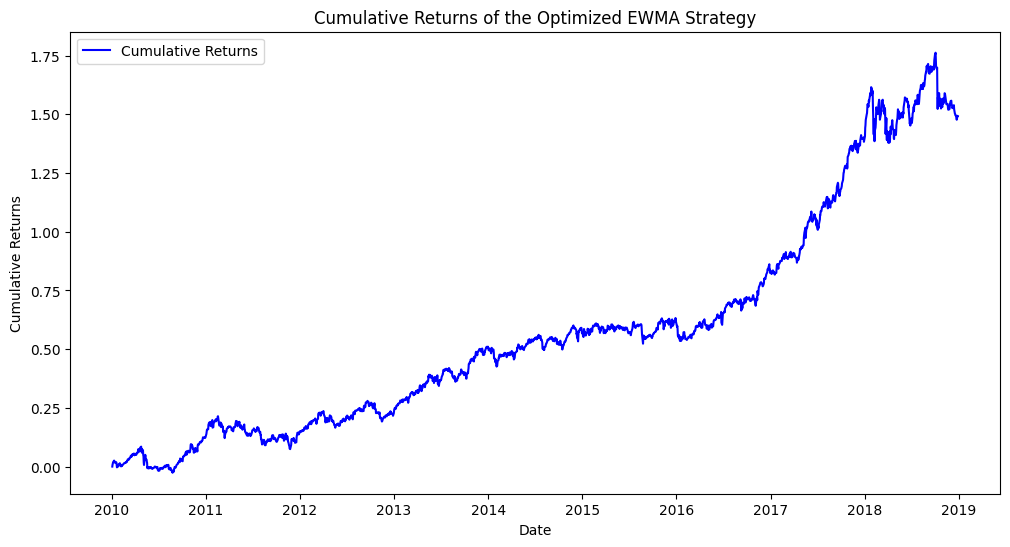

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define ranges for short and long EMWA spans
short_spans = [20, 30, 50]
long_spans = [100, 150, 200]

# Step 2: Initialize variables to store the best results
best_sharpe = -np.inf
best_short_span = None
best_long_span = None
best_strategy_returns = None
best_signals = None

# Step 3: Loop through span combinations
for short_span in short_spans:
    for long_span in long_spans:
        if short_span >= long_span:
            continue

        # Calculate EWMA
        ewma_short = data.ewm(span=short_span, adjust=False).mean()
        ewma_long = data.ewm(span=long_span, adjust=False).mean()

        # Generate buy/sell signals
        signals = ewma_short > ewma_long

        # Calculate daily returns
        returns = np.log(data / data.shift(1))

        # Implement the strategy
        strategy_returns = pd.DataFrame(index=returns.index)
        for ticker in tickers:
            strategy_returns[ticker] = np.where(signals[ticker], returns[ticker], 0)

        # Calculate performance metrics
        average_return = strategy_returns.mean() * 252
        volatility = strategy_returns.std() * np.sqrt(252)
        sharpe_ratio = (average_return / volatility).mean()

        # Update the best Sharpe ratio and parameters
        if sharpe_ratio > best_sharpe:
            best_sharpe = sharpe_ratio
            best_short_span = short_span
            best_long_span = long_span
            best_strategy_returns = strategy_returns
            best_signals = signals

# Step 4: Evaluate the best strategy
cumulative_returns = (1 + best_strategy_returns).cumprod() - 1
average_return = best_strategy_returns.mean() * 252
volatility = best_strategy_returns.std() * np.sqrt(252)
sharpe_ratio = average_return / volatility

# Maximum Drawdown
cumulative_max = cumulative_returns.cummax()
drawdown = cumulative_returns - cumulative_max
max_drawdown = drawdown.min()

# Calmar Ratio
calmar_ratio = (average_return / abs(max_drawdown)).mean()

# Sortino Ratio (assuming a MAR of 0)
negative_returns = best_strategy_returns[best_strategy_returns < 0].std() * np.sqrt(252)
sortino_ratio = (average_return / negative_returns).mean()

# Hit Ratio
hit_ratio = (best_strategy_returns > 0).mean().mean()

# Tail Risk (VaR and CVaR)
var_95 = best_strategy_returns.quantile(0.05).mean()
cvar_95 = best_strategy_returns[best_strategy_returns <= var_95].mean().mean()

# Stability of Returns
cumulative_mean = cumulative_returns.mean(axis=1)
time_index = np.arange(len(cumulative_mean))
stability = np.polyfit(time_index, cumulative_mean, 1)[0]

# Display results
print(f"Optimal Short EMWA Span: {best_short_span}")
print(f"Optimal Long EMWA Span: {best_long_span}")
print("\nAverage Return (Annualized):\n", average_return)
print("\nVolatility (Annualized):\n", volatility)
print("\nSharpe Ratio:\n", sharpe_ratio)
print("\nMaximum Drawdown:\n", max_drawdown)
print("\nCalmar Ratio:\n", calmar_ratio)
print("\nSortino Ratio:\n", sortino_ratio)
print("\nHit Ratio (Percentage of Positive Days):\n", hit_ratio * 100)
print("\n95% VaR:\n", var_95)
print("\n95% CVaR:\n", cvar_95)
print("\nStability of Returns (R-squared):\n", stability)

# Step 5: Plot the cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns.mean(axis=1), label="Cumulative Returns", color="blue")
plt.title("Cumulative Returns of the Optimized EWMA Strategy")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()
